# <font  color = "#0093AF">Understanding DARR with simulation</font>

<a href="https://githubtocolab.com/alsinmr/SLEEPY_tutorial/blob/main/ColabNotebooks/Chapter3/Ch3_DARR.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>

While SLEEPY is mainly intended for predicting relaxation behavior or observing the influence of relaxation on a spin-system, it is also useful for simplifying other experiments by replacing diffusion-like behavior resulting from many spins with an artificial diffusion term in the Liouvillian. For example, some NMR experiments rely on spin-diffusion within the dense $^1$H network to induce broadening on heteronuclei which then drives spin-diffusion among the heteronuclei. The prime examples of this are the Proton-Driven Spin-Diffusion experiment (PDSD) and the Dipolar Assisted Rotational Resonance (DARR) experiments.

DARR is the homonuclear ($^{13}$C-$^{13}$C) transfer of longitudinal magnetization, enabled by broadening of the Rotary Resonance (R$^2$) condition. Broadening of the R$^2$ condition is achieved via reintroduction of a heteronuclear dipole coupling ($^1$H-$^{13}$C) to the homonuclear spins by satisfying the Rotary Resonance Recoupling (R$^3$) condition.

We will achieve a DARR transfer by artificially broadening the $^1H$ line using relaxation settings in SLEEPY. Note that it is also possible to introduce a large number of $^1$H spins (10) which will also give rise to the required broadening. The latter approach has been demonstrated in [SpinEvolution](https://spinevolution.com/) by Veshtort and Griffin.

We will take several steps to piece together the DARR experiment.

**A. Static experiments**
1. Simulate $^{13}$C–$^{13}$C transfer occuring via homonuclear dipole couplings, where the two spins have the same resonance frequency (resonant transfer).
2. Simulate $^{13}$C–$^{13}$C transfer occuring via homonuclear dipole couplings, where the two spins have different resonance frequencies and have an intrinsic linewidth due to $T_2$.
3. Simulate $^{13}$C–$^{13}$C transfer occuring via homonuclear dipole couplings, where the two spins have different resonance frequencies and have an intrinsic linewidth induced by coupling to $^1$H.
**B. Experiments under MAS**
1. Simulate $^{13}$C–$^{13}$C transfer occuring via homonuclear dipole couplings, where the two spins are separated by the rotor frequency.
2. Simulate $^{13}$C–$^{13}$C transfer occuring via homonuclear dipole couplings, where the two spins have resonance frequencies not separated by the rotor frequency, but have an intrinsic linewidth due to $T_2$.
3. Simulate $^{13}$C–$^{13}$C transfer occuring via homonuclear dipole couplings, where the two spins have resonance frequencies not separated by the rotor frequency, but have an intrinsic linewidth induced by coupling to $^1$H.
4. Simulate $^{13}$C–$^{13}$C transfer occuring via homonuclear dipole couplings, where the two spins have resonance frequencies not separated by the rotor frequency, but have an intrinsic linewidth induced by coupling to $^1$H, which is broadened by satisfying the DARR condition.

**References**

*DARR:* 

K. Takegoshi, S. Nakamura, T. Terao. [*Chem. Phys. Lett.*](http://dx.doi.org/10.1016/S0009-2614%2801%2900791-6), **2001**, 344, 631-637.

K. Takegoshi, S. Nakamura, T. Terao. [*J. Chem. Phys.*](https://doi.org/10.1063/1.1534105), **2003**, 118, 2325-2341.

*Simulating DARR*

M. Veshtort, R.G. Griffin. [*J. Chem. Phys.*](https://doi.org/10.1063/1.3635374), **2011**, 135, 134509.

*Rotary Resonance Recoupling:*

T.G. Oas, R.G. Griffin, M.H. Levitt. [*J. Chem. Phys.*](https://doi.org/10.1063/1.455191) **1988**, 89, 692-695.

*Rotational Resonance:*

D.P. Raleigh, M.H. Levitt, R.G. Griffin. [*Chem. Phys. Lett.*](https://doi.org/10.1016/0009-2614(88)85051-6), **1988**, 146, 71-76.


E.R. Andrew, S. Clough, L.F. Farnell, T.D. Gledhill, I. Roberts. [*Phys. Letters*](https://doi.org/10.1016/0031-9163(66)91274-1), **1966**, 21, 505-506.

E.R. Andrew, A. Bradbury, R.G. Eades, V.T. Wynn. [*Phys. Letters*](https://doi.org/10.1016/0031-9163(63)90123-9), **1963**, 4, 99.

In [0]:
# SETUP SLEEPY
import sys
if 'google.colab' in sys.modules:
  !pip install sleepy-nmr

## Setup

In [2]:
import SLEEPY as sl
import matplotlib.pyplot as plt
import numpy as np

## A. Static Experiments

### 1) Transfer between coupled spins with same resonance frequency

In [3]:
#C-C dipole, 2.5 Angstrom distance
dCC=sl.Tools.dipole_coupling(.25,'13C','13C',)
print(f'delta(C–C) = {dCC:.1f} Hz')

# Build the spin-system (two nuclei, no MAS, dipole coupled with no chemical shift)
ex=sl.ExpSys(v0H=600,Nucs=['13C','13C'],vr=0,pwdavg=sl.PowderAvg('zcw232'))
ex.set_inter('dipole',i0=0,i1=1,delta=dCC)

# Liouvillian
L=ex.Liouvillian()

# Pulse sequence (no sequence- just a time step)
Dt=1/50000 #20 microsecond timestep (we'll use 10 kHz MAS later with 5 steps per rotor cycle)
seq=L.Sequence().add_channel('13C',t=Dt)

# Initial density matrix/detection operator for spectrum
rho_spec=sl.Rho(rho0='13Cx',detect='13Cp')

# Initial density matrix/detection operator for transverse magnetization transfer
rho_zz=sl.Rho(rho0='S0z',detect=['S0z','S1z'])

delta(C–C) = 972.6 Hz


In [4]:
rho_spec.clear()
_=rho_spec.DetProp(seq,n=5000)

State-space reduction: 16->4


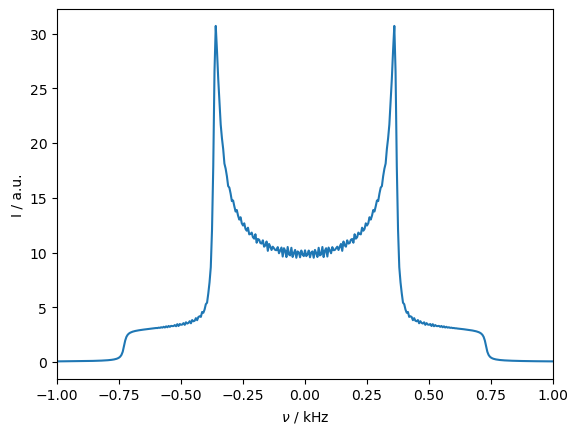

In [5]:
ax=rho_spec.plot(FT=True,apodize=True)
_=ax.set_xlim([-1,1])

In [6]:
rho_zz.clear()
rho_zz.DetProp(seq,n=600)

State-space reduction: 16->6


Density Matrix/Detection Operator
rho0: S0z
detect[0]: S0z
detect[1]: S1z
Current time is 12000.000 microseconds
600 time points have been recorded


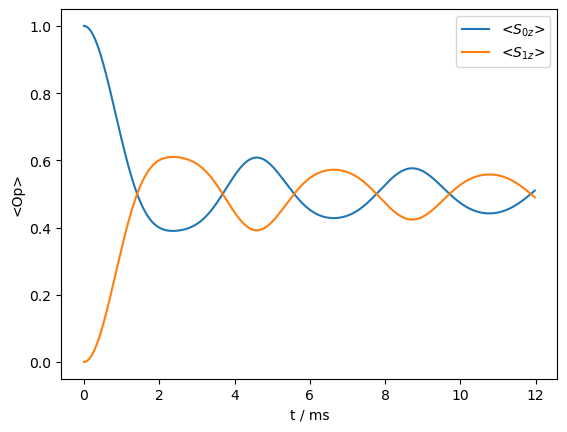

In [7]:
_=rho_zz.plot()

Above, we see the spectrum, which has a characteristic Pake-pattern, resulting from the dipole coupling between the two spins. Because the two spins have identical resonance frequencies, they mix, allowing the transfer of z-magnetization from one spin ($S_{0z}$) to the other spin ($S_{1z}$).

We can investigate the Hamiltonian driving this transfer more closely by plotting it.

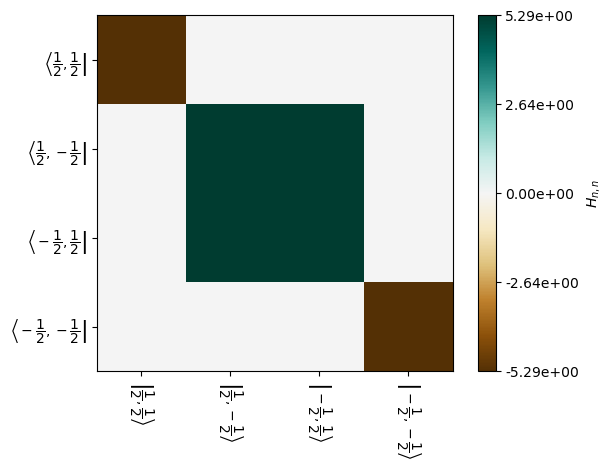

In [8]:
_=L.H[0].plot(mode='re')

Spin magnetization transfers because the $|1/2,-1/2\rangle$ and $|-1/2,1/2\rangle$ states mix. This may also be observed in the Liouvillian, made easier to see by zooming in on the correct set of states:

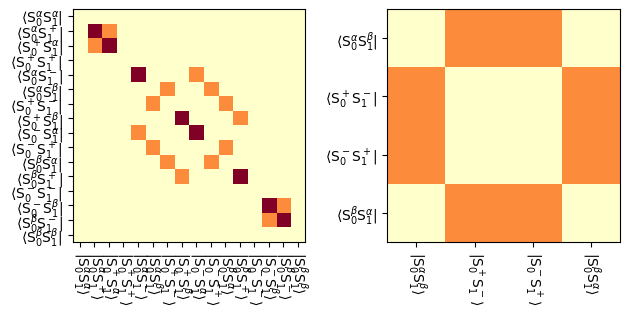

In [9]:
fig,ax=plt.subplots(1,2)
L.plot(ax=ax[0],mode='abs',colorbar=False)
L.plot(block=4,ax=ax[1],mode='abs',colorbar=False)
_=fig.tight_layout()

We see in the reduced space that $S_1^\alpha S_2^\beta$ is driven into the zero- and double-quantum coherences by the dipole coupling, and subsequently arrives in $S_1^\beta S_2^\alpha$, which is a transfer of magnetization from spin 1 to spin 2.

### 2) Transfer between coupled spins with different resonance frequency

In the next step, we consider what happens if the two spins are separate by a few ppm (10 ppm, resulting in a 10x150=1500 Hz separation). 

In [10]:
# We keep working with the previous spin-system, so we just need to add the chemical shifts
ex.set_inter('CS',i=0,ppm=5)
ex.set_inter('CS',i=1,ppm=-5)

# The following components need to be rebuilt for the new edited spin-system
# Liouvillian
L=ex.Liouvillian()

# Pulse sequence (no sequence- just a time step)
Dt=1/50000 #20 microsecond timestep (we'll use 10 kHz MAS later with 5 steps per rotor cycle)
seq=L.Sequence().add_channel('13C',t=Dt)

# Initial density matrix/detection operator for spectrum
rho_spec=sl.Rho(rho0='13Cx',detect='13Cp')

# Initial density matrix/detection operator for transverse magnetization transfer
rho_zz=sl.Rho(rho0='S0z',detect=['S0z','S1z'])

In [11]:
rho_spec.clear()
_=rho_spec.DetProp(seq,n=5000)

State-space reduction: 16->4


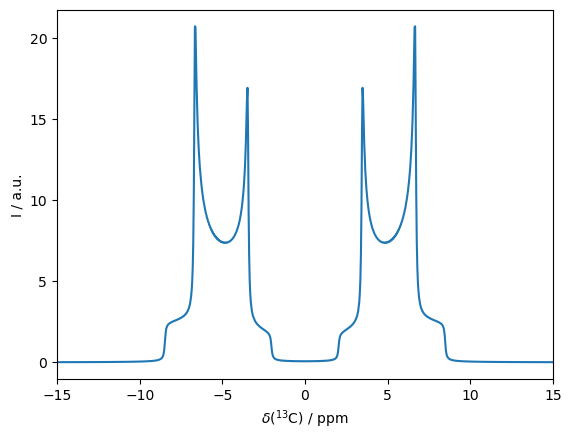

In [12]:
ax=rho_spec.plot(FT=True,apodize=True,axis='ppm')
_=ax.set_xlim([-15,15])

Now, we observe to separated Pake-patterns, separated by roughly 10 ppm.

In [13]:
rho_zz.clear()
_=rho_zz.DetProp(seq,n=6000)

State-space reduction: 16->6


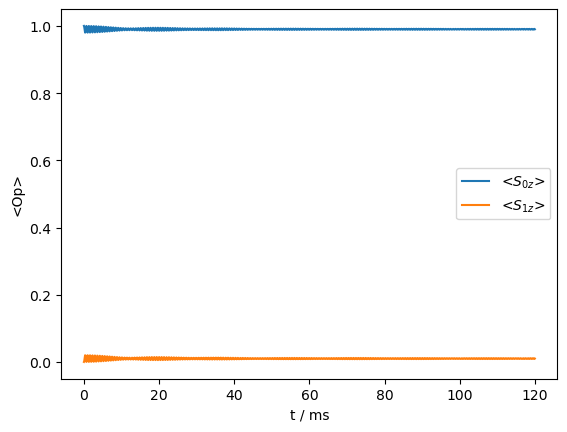

In [14]:
_=rho_zz.plot()

The separation in resonance frequency quenches the transfer between spins. This can be understood by observing the impact on the Hamiltonian. While the dipole coupling is not gone, it is now smaller than the difference in chemical shift, so that the states no longer mix.

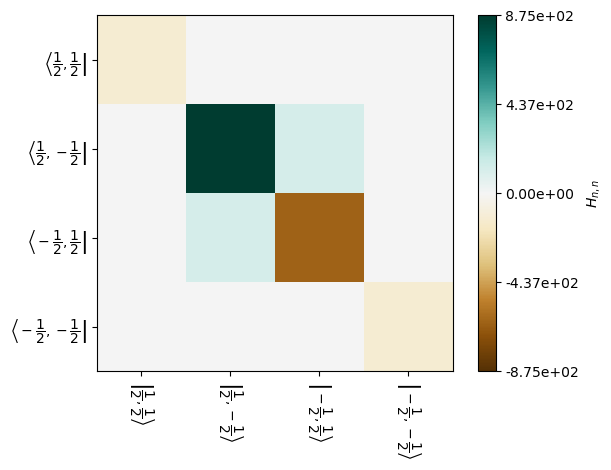

In [15]:
_=L[50].H[0].plot(mode='re')

However, what would happen if some $T_2$ broadening is introduced to the two spins, such that there is a small amount of overlap?

In [16]:
L.add_relax(Type='T2',i=0,T2=.002)
L.add_relax(Type='T2',i=1,T2=.002)

seq=L.Sequence().add_channel('13C',t=100*Dt) # Transfer is a lot slower, so take bigger steps

rho_zz.clear()
_=rho_zz.DetProp(seq,n=500)

State-space reduction: 16->6


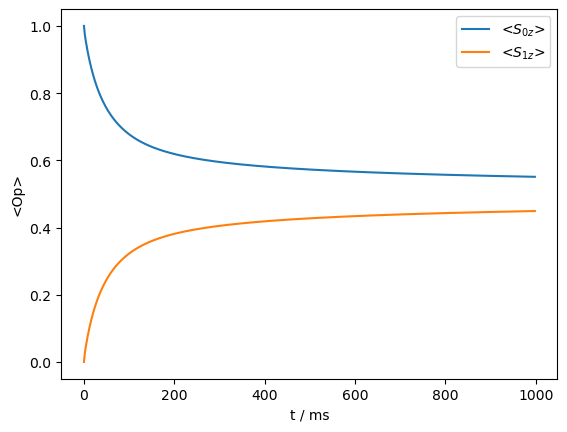

In [17]:
_=rho_zz.plot(axis='ms')

As we see, the transfer is reintroduced, although it is considerably slower, and no longer coherent. 

### 3) Transfer between coupled spins with different resonance frequency, coupled to a flipping $^1$H

We often refer to $^{13}C$-$^{13}C$ transfer without a field applied to $^1$H as Proton-Driven Spin-Diffusion (PDSD). But what does this transfer have to do with protons? It turns out that the broadening required for the transfer may be provided indirectly by a coupling to $^1$H that undergoes flipping.

For this experiment, then, we need to add another spin. We'll add a one-bond H–C dipole coupling to one of the two $^{13}$C. We start without flipping on the $^1H$, but then introduce it in a subsequent step.

In [18]:
dHC=sl.Tools.dipole_coupling(.11,'1H','13C')

# Build the spin-system (two nuclei, no MAS, dipole coupled with no chemical shift)
ex=sl.ExpSys(v0H=600,Nucs=['13C','13C','1H'],vr=0,pwdavg=sl.PowderAvg('zcw232'))
ex.set_inter('dipole',i0=0,i1=1,delta=dCC)
ex.set_inter('dipole',i0=0,i1=2,delta=dHC,euler=[0,np.pi/4,0]) 
#Couplings usually shouldn't be colinear

# Liouvillian
L=ex.Liouvillian()

# Pulse sequence (no sequence- just a time step)
Dt=1/50000 #20 microsecond timestep (we'll use 10 kHz MAS later with 5 steps per rotor cycle)
seq=L.Sequence().add_channel('13C',t=Dt)

# Initial density matrix/detection operator for spectrum
rho_spec=sl.Rho(rho0='13Cx',detect='13Cp')

# Initial density matrix/detection operator for transverse magnetization transfer
rho_zz=sl.Rho(rho0='S0z',detect=['S0z','S1z'])

In [19]:
seq=L.Sequence().add_channel('13C',t=Dt) # Transfer is a lot slower, so take bigger steps

rho_spec.clear()
rho_spec.DetProp(seq,n=15000)

rho_zz.clear()
_=rho_zz.DetProp(seq,n=500*100)

State-space reduction: 64->8
State-space reduction: 64->12


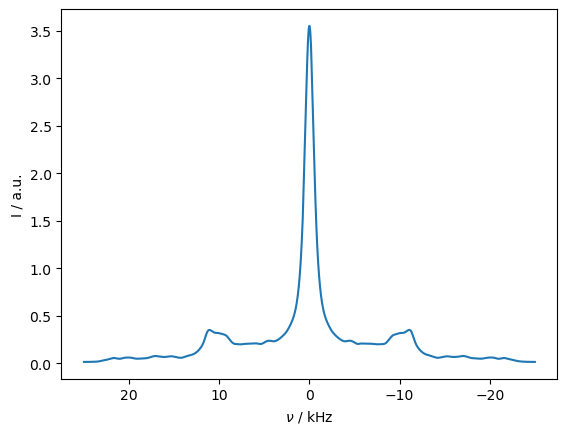

In [20]:
rho_spec.apod_pars['LB']=1000
_=rho_spec.plot(FT=True,apodize=True)

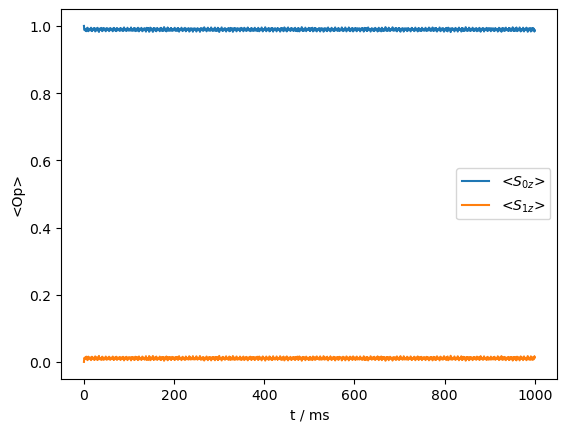

In [21]:
_=rho_zz.plot()

The $^1$H dipole coupling alone is insufficient to drive a transfer, but if the $^1$H undergoes flipping due to spin diffusion, then the transfer occurs.

In [22]:
L.add_relax(Type='SpinDiffusion',i=2,k=300) #Spin-diffusion on 1H

rho_spec.clear()
rho_spec.DetProp(seq,n=15000)

rho_zz.clear()
_=rho_zz.DetProp(seq,n=50000)

State-space reduction: 64->8
State-space reduction: 64->12


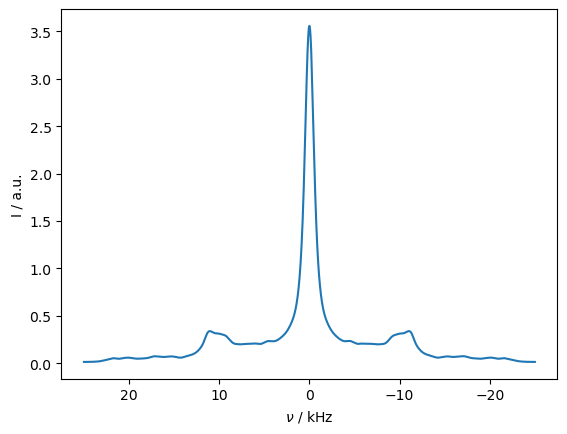

In [23]:
_=rho_spec.plot(FT=True,apodize=True)

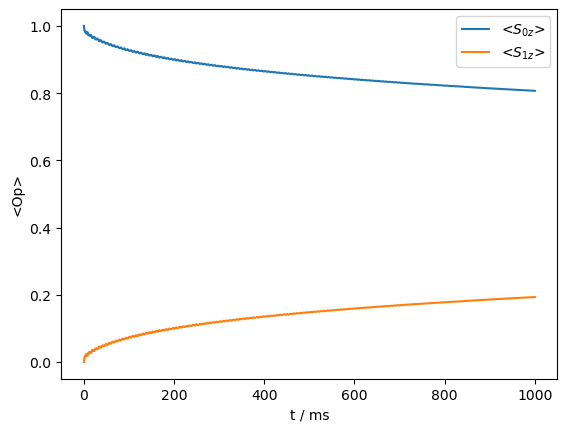

In [24]:
_=rho_zz.plot()

## B. Magic-Angle Spinning Experiments

Previously, we found that two dipole-coupled spins with the same chemical shift resulted in transfer of longitudinal magnetization between them. Here, we test if the same principle applies under magic angle spinning (10 kHz).

### 1) Transfer when two spins are separated by the rotor frequency

In [25]:
# Build the spin-system (two nuclei, no MAS, dipole coupled with no chemical shift)
ex=sl.ExpSys(v0H=600,Nucs=['13C','13C'],vr=10000)
ex.set_inter('dipole',i0=0,i1=1,delta=dCC)

# Liouvillian
L=ex.Liouvillian()

# Pulse sequence (no sequence- just a time step)
seq=L.Sequence()  #Sequence defaults to 1 rotor period when spinning

# Initial density matrix/detection operator for spectrum
rho_spec=sl.Rho(rho0='13Cx',detect='13Cp')

# Initial density matrix/detection operator for transverse magnetization transfer
rho_zz=sl.Rho(rho0='S0z',detect=['S0z','S1z'])

In [26]:
rho_spec.DetProp(seq,n=15000)
_=rho_zz.DetProp(seq,n=1000)

State-space reduction: 16->4
State-space reduction: 16->6


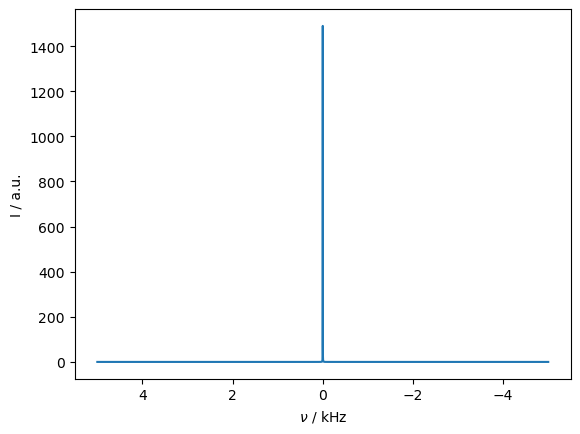

In [27]:
_=rho_spec.plot(FT=True,apodize=True)

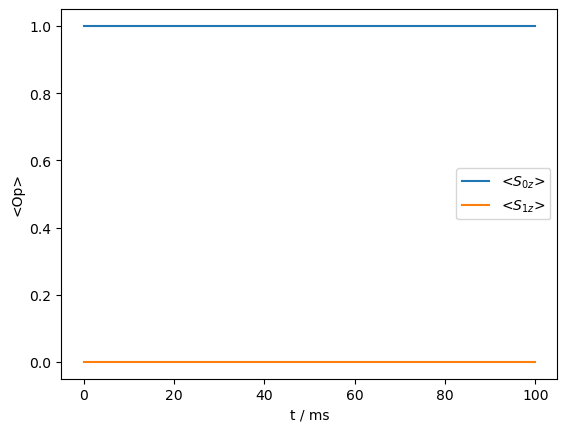

In [28]:
_=rho_zz.plot()

Magic angle spinning quenches the transfer by averaging the dipole coupling to zero. On the other hand, if the spins are separated by the MAS frequency (i.e. the $R^2$ condition), the coupling is reintroduced

In [29]:
DelCS=10000/(600*sl.Tools.NucInfo('13C')/sl.Tools.NucInfo('1H'))
ex.set_inter('CS',i=0,ppm=DelCS/2)
ex.set_inter('CS',i=1,ppm=-DelCS/2)

# Liouvillian
L=ex.Liouvillian()

# Pulse sequence (no sequence- just a time step)
seq=L.Sequence()  #Sequence defaults to 1 rotor period when spinning

# Initial density matrix/detection operator for spectrum
rho_spec=sl.Rho(rho0='13Cx',detect='13Cp')

# Initial density matrix/detection operator for transverse magnetization transfer
rho_zz=sl.Rho(rho0='S0z',detect=['S0z','S1z'])

In [30]:
_=rho_spec.DetProp(seq,n=5000,n_per_seq=2)

State-space reduction: 16->4
Prop: 2 steps per every 1 rotor period


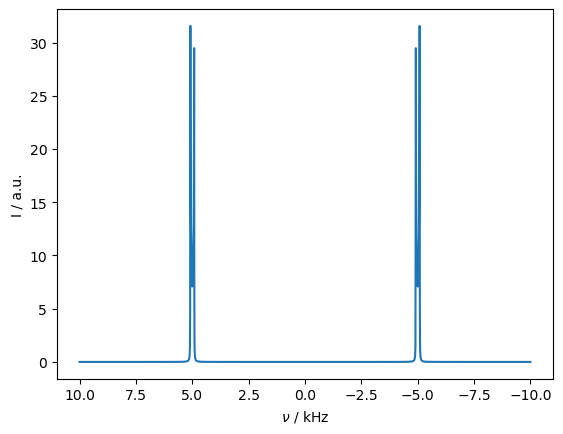

In [31]:
_=rho_spec.plot(FT=True,apodize=True)

Matching the rotational resonance condition distorts the spectrum by reintroducing the dipole coupling. 

In [32]:
rho_zz.clear()
_=rho_zz.DetProp(seq,n=100)

State-space reduction: 16->6


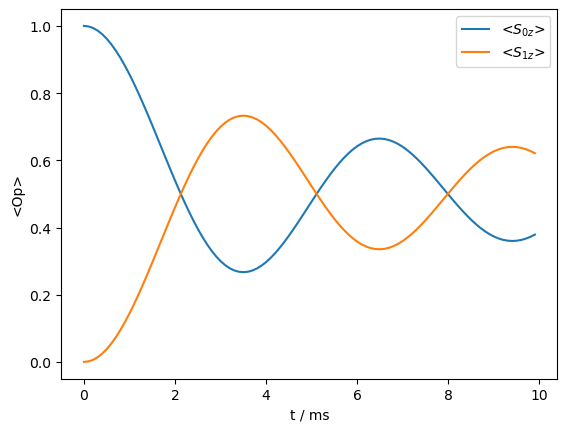

In [33]:
_=rho_zz.plot()

The rotational resonance condition induces a transfer, but it also distorts the spectrum, and furthermore can only be matched for one pair of spins at a time. So, we move off the rotational resonance condition.

In [34]:
ex.set_inter('CS',i=0,ppm=-15) #Shift away from rotational resonance
ex.set_inter('CS',i=1,ppm=15) #Shift away from rotational resonance

# Liouvillian
L=ex.Liouvillian()

# Pulse sequence (no sequence- just a time step)
seq=L.Sequence()  #Sequence defaults to 1 rotor period when spinning

# Initial density matrix/detection operator for spectrum
rho_spec=sl.Rho(rho0='13Cx',detect='13Cp')

# Initial density matrix/detection operator for transverse magnetization transfer
rho_zz=sl.Rho(rho0='S0z',detect=['S0z','S1z'])

In [35]:
_=rho_spec.DetProp(seq,n=5000,n_per_seq=2)

State-space reduction: 16->4
Prop: 2 steps per every 1 rotor period


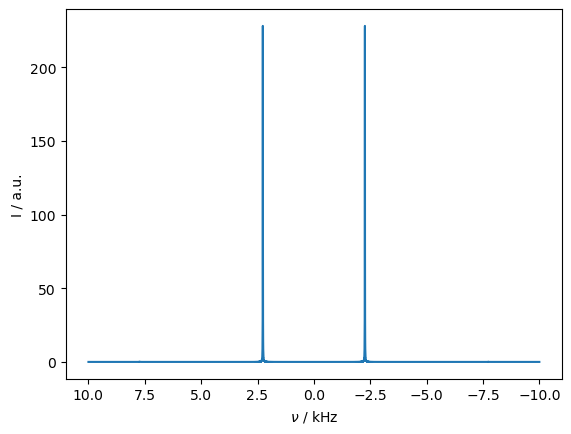

In [36]:
_=rho_spec.plot(FT=True,apodize=True)

Away from rotational resonance, our spectrum looks nicer, but what happens to our transfer?

In [37]:
rho_zz.clear()
_=rho_zz.DetProp(seq,n=1500)

State-space reduction: 16->6


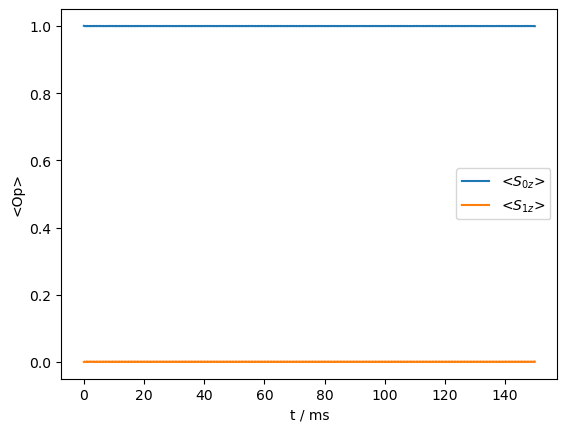

In [38]:
_=rho_zz.plot()

Not surprisingly, the transfer is quenched. It can be reintroduced by broadening of the $^{13}$C resonance

### 2) Transfer between spins away from rotary resonance, broadened by T$_2$

In [39]:
L.clear_relax()
L.add_relax(Type='T2',i=0,T2=.001)
_=L.add_relax(Type='T2',i=1,T2=.001)

In [40]:
rho_zz.clear()
_=rho_zz.DetProp(seq,n=15000)

State-space reduction: 16->6


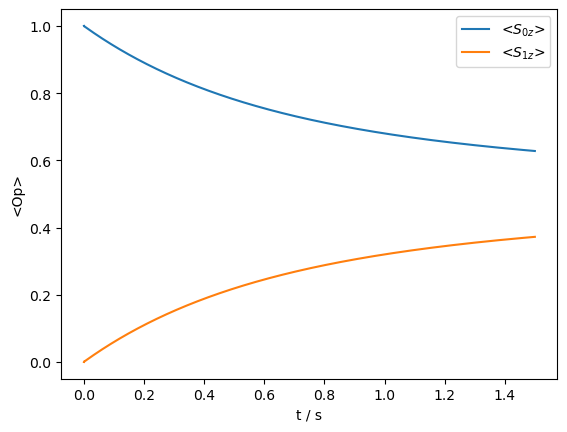

In [41]:
_=rho_zz.plot()

Then, can we achieve the same affect by coupling to a $^1$H?

### 3) Transfer between spins away from rotary resonance, broadened by coupled $^1$H

In [42]:
# Build the spin-system (two nuclei, no MAS, dipole coupled with no chemical shift)
ex=sl.ExpSys(v0H=600,Nucs=['13C','13C','1H'],vr=10000)
ex.set_inter('dipole',i0=0,i1=1,delta=dCC)
ex.set_inter('dipole',i0=0,i1=2,delta=dHC,euler=[0,np.pi/4,0])
ex.set_inter('CS',i=0,ppm=15)
ex.set_inter('CS',i=1,ppm=-15)

# Liouvillian
L=ex.Liouvillian()
L.add_relax('SpinDiffusion',i=2,k=300)

# Pulse sequence (no sequence- just a time step)
seq=L.Sequence()

# Initial density matrix/detection operator for transverse magnetization transfer
rho_zz=sl.Rho(rho0='S0z',detect=['S0z','S1z'])

In [43]:
_=rho_zz.DetProp(seq,n=15000)

State-space reduction: 64->12


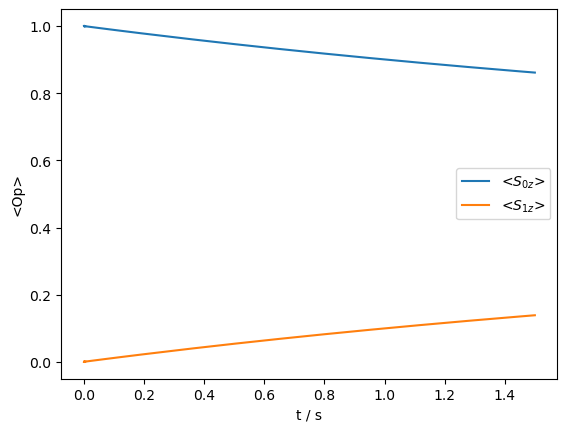

In [44]:
_=rho_zz.plot()

Some transfer occurs, although it is not particularly efficient. We finally want to understand what happens if we introduce a field on the $^1$H matching the rotary resonance recoupling (R$^3$) condition

### Transfer between spins not on rotary resonance, broadened by irradiation of protons.

First, we observe the $^{13}$C spectrum with $^1$H cw decoupling, first away from the rotary resonance recoupling condition, and then on the condition. Lines mark the resonance frequency of the first $^{13}$C and the distance to the corresponding rotational resonance condition.

In [45]:
rho_spec=sl.Rho(rho0='13Cx',detect='13Cp')
_=rho_spec.DetProp(seq,n=5000,n_per_seq=5)

State-space reduction: 64->8
Prop: 5 steps per every 1 rotor period


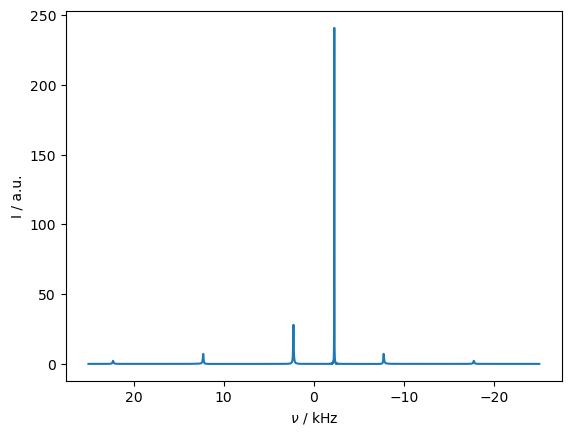

In [46]:
_=rho_spec.plot(FT=True,apodize=True)

In [47]:
seq.add_channel('1H',v1=10000)
rho_spec.clear()
_=rho_spec.DetProp(seq,n=25000,n_per_seq=5)

State-space reduction: 64->16
Prop: 5 steps per every 1 rotor period


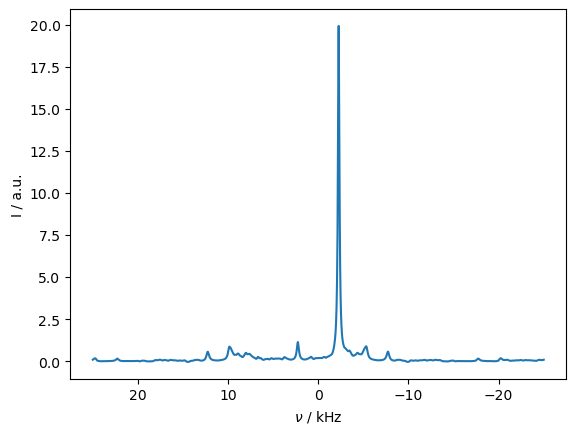

In [48]:
rho_spec.apod_pars['LB']=200
ax=rho_spec.plot(FT=True,apodize=True)

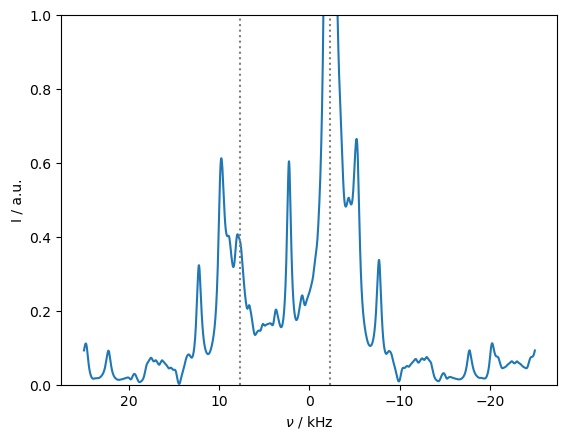

In [49]:
rho_spec.apod_pars['LB']=500
ax=rho_spec.plot(FT=True,apodize=True)
ax.set_ylim([0,1])
CS=-15*ex.v0[0]/1e9
ax.plot([CS,CS],ax.get_ylim(),color='grey',linestyle=':')
_=ax.plot([CS+10,CS+10],ax.get_ylim(),color='grey',linestyle=':')

In [50]:
rho_zz.clear()
_=rho_zz.DetProp(seq,n=15000)

State-space reduction: 64->24


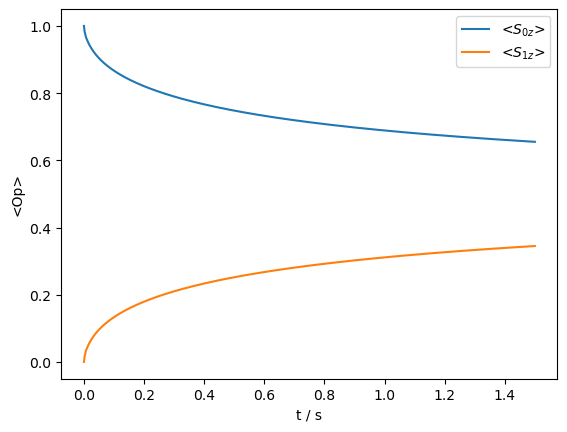

In [51]:
_=rho_zz.plot()

Then, we see how broadening the C-C R$^2$ condition via recoupling the H–C dipole coupling with R$^3$ allows for C-C spin-diffusion to occur. This is also a convenient way to achieve the required broadening, since to recover an unbroadened spectrum, we must simply remove the field from the $^1$H channel (or better yet, apply heteronuclear decoupling).